# Fundraising Dataset RFM Analysis
>In a fundraising setting, donors can be categorized based on many factors like their total giving, largest giving, relationship to the university (friend,alumni,student etc).The most popular and intuitive one is the RFM Analysis. It gives one a bird's eye view of their donor population and its characteristics. RFM stands for Recency Frequency Monetary. These words are pretty self explanatory:
<li>Recency : The time gap between the last gift made and the present day.
<li>Frequency : The number of donations made by each person.
<li>Monetary : The Total value of donations made by the donor till date.

RFM characteristics give an overview on the donor behaviour with respect to their gifts. This can be used to categorize them into many classes like (High Recency-Low Frequency-High Monetary),(Low Recency-Low Frequency-High Monetary) and so on. Just using this type of classification there are 8 categories that a donor can be put into. This classification helps in data driven decision making when it comes to campaigns and other fundraising activities like email campaigns etc.



In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SampleDataRFM.csv')
df1=df['Giving'].str.lstrip('$') #removing $ sign from the Giving Column
df1=df1.str.replace(',','') #Removing ',' from the column

df['Giving']=pd.to_numeric(df1)#converting column to numerical value
df.head()


,ID,FISCAL_YEAR,Giving
0,1,2015,1000
1,1,2016,600
2,2,2012,100
3,2,2013,55
4,2,2014,160


In [192]:
frequency=pd.DataFrame(df.groupby('ID').Giving.count()) #calculating donation frequency for each donor
frequency['ID']=frequency.index
recency=pd.DataFrame(2016-df.groupby('ID').FISCAL_YEAR.max()) #calculating recency for each donor
recency['ID']=recency.index
monetary=pd.DataFrame(df.groupby('ID').agg({'Giving':np.sum})) #summing donation by each donor
monetary['ID']=monetary.index
rf=pd.merge(recency,frequency, on='ID') #merging tables
rfm=pd.merge(rf,monetary,on='ID')
rfm.rename(index=str, columns={"FISCAL_YEAR":"recency","Giving_x":"frequency","Giving_y":"monetary"},inplace=True)
rfm=rfm[['ID','recency','frequency','monetary']]
rfm.head()

,ID,recency,frequency,monetary
0,1,0,2,1600
1,2,0,5,1585
2,3,0,4,2930
3,4,0,3,1725
4,5,3,2,1555


In [233]:
rfm['frequency_rank']=pd.cut(rfm['frequency'],5,labels=False)+1 #ranking frequency by quntiles
rfm['recency_rank']=5-pd.cut(rfm['recency'],5,labels=False) #ranking recency by quntiles
rfm['monetary_rank']=pd.qcut(rfm['monetary'],5,labels=False)+1 #ranking monetary by quntiles
#creating weighted standardised RFM scores
rfm['rfm_score']=(rfm['recency_rank'].astype(str)+rfm['frequency_rank'].astype(str)+rfm['monetary_rank'].astype(str)).astype(int) #RFM score
#rfm['weighted_standardized_rfm']=(((max(rfm['recency'])-rfm['recency'])-rfm['recency'].mean())*rfm['recency_rank']/rfm['recency'].std()) +((rfm['frequency']-rfm['frequency'].mean())*rfm['frequency_rank']/rfm['frequency'].std())+((rfm['monetary_rank'])*(rfm['monetary']-rfm['monetary'].mean())/rfm['monetary'].std())
rfm=rfm[['ID', 'recency', 'frequency','monetary','frequency_rank','recency_rank','monetary_rank','rfm_score']]
rfm.head()

,ID,recency,frequency,monetary,frequency_rank,recency_rank,monetary_rank,rfm_score
0,1,0,2,1600,2,5,4,524
1,2,0,5,1585,5,5,4,554
2,3,0,4,2930,4,5,5,545
3,4,0,3,1725,3,5,4,534
4,5,3,2,1555,2,2,4,224


## Relationships and Distributions
>We visually explore the relationships among RFM values and ranks to get a better understanding




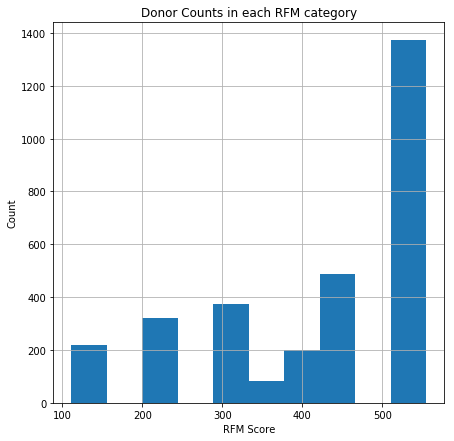

In [234]:
plt0=plt.figure(figsize=(7,7))
rfm['rfm_score'].hist()
plt.title('Donor Counts in each RFM category')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()

> we can see from this plot that a high number of people lie in the 500 above category. i.e high frequency, high recency,high monetary. To get a better sense of how all three values i.e R F and M are affecting our data, let us look further plots below

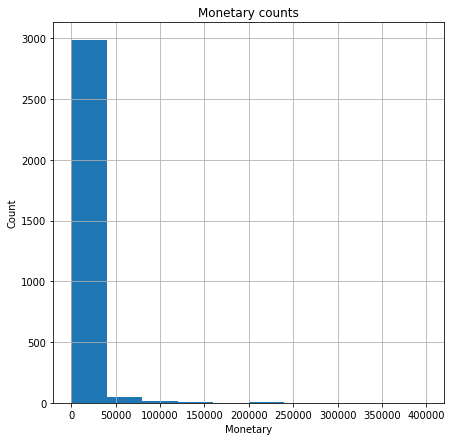

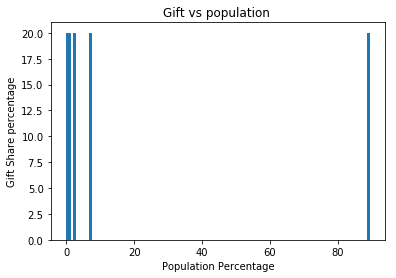

,monetary rank,percentage gift share,population proportion,total gifts
1,1,0.249571,20.013080,31323
2,2,0.982834,20.013080,123353
3,3,2.452339,20.013080,307787
4,4,7.172909,19.947678,900254
5,5,89.142347,20.013080,11188034


In [272]:
plt2=plt.figure(figsize=(7,7))
rfm['monetary'].hist()
plt.title('Monetary counts')
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.show()

total=rfm['monetary'].sum()
pop=rfm['ID'].count()
rank1=rfm[rfm['monetary_rank']==1].monetary.sum()
rank2=rfm[rfm['monetary_rank']==2].monetary.sum()
rank3=rfm[rfm['monetary_rank']==3].monetary.sum()
rank4=rfm[rfm['monetary_rank']==4].monetary.sum()
rank5=rfm[rfm['monetary_rank']==5].monetary.sum()

population1=100*rfm[rfm['monetary_rank']==1].ID.count()/pop
population2=100*rfm[rfm['monetary_rank']==2].ID.count()/pop
population3=100*rfm[rfm['monetary_rank']==3].ID.count()/pop
population4=100*rfm[rfm['monetary_rank']==4].ID.count()/pop
population5=100*rfm[rfm['monetary_rank']==5].ID.count()/pop

prc1=100*float(rfm[rfm['monetary_rank']==1].monetary.sum()/total)
prc2=100*float(rfm[rfm['monetary_rank']==2].monetary.sum()/total)
prc3=100*float(rfm[rfm['monetary_rank']==3].monetary.sum()/total)
prc4=100*float(rfm[rfm['monetary_rank']==4].monetary.sum()/total)
prc5=100*float(rfm[rfm['monetary_rank']==5].monetary.sum()/total)

gift=pd.DataFrame({'total gifts':[rank1,rank2,rank3,rank4,rank5],
     'population proportion':[population1,population2,population3,population4,population5],
     'percentage gift share':[prc1,prc2,prc3,prc4,prc5],'monetary rank':[1,2,3,4,5]} ,index=[1,2,3,4,5])
gift


plt6=plt.figure()
plt.bar(gift['percentage gift share'],gift['population proportion'])
plt.title('Gift vs population ')
plt.xlabel('Population Percentage')
plt.ylabel('Gift Share percentage')
plt.show()
from IPython.display import display
display(gift)

>It is evident from the first plot that the data is highly right skewed. The next bar makes it all the more clear. We get to know that only about 20% of the population is repsonsible for almost 90% of the donations.The remaining 80% is responsible for only 10% of the donations.This dataset almost ideally obeys the 80-20 rule.

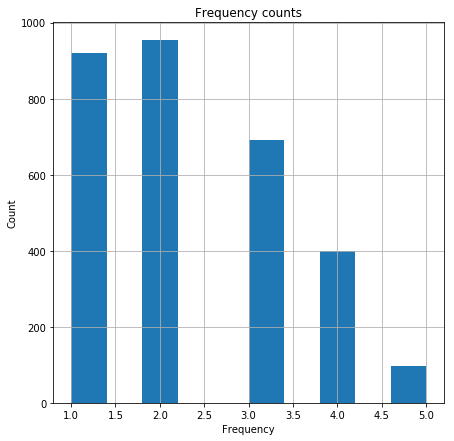

In [183]:
plt3=plt.figure(figsize=(7,7))
rfm['frequency'].hist()
plt.title('Frequency counts')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

>From above figure we can conclude that most of the people have donated about twice till date followed by one time donors. Number of people decreases with the frequency.


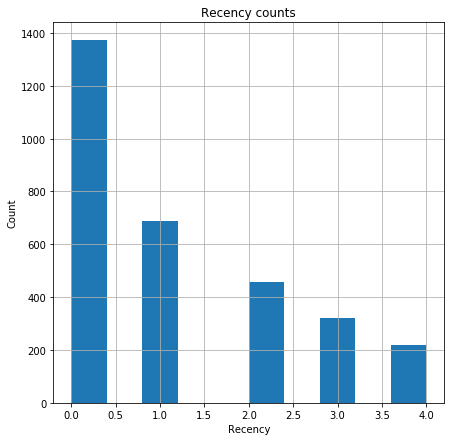

In [184]:
plt4=plt.figure(figsize=(7,7))
rfm['recency'].hist()
plt.title('Recency counts')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

> About 45% of the donors have donated recently. That is a good recency number as almost half of the population is present.Recent donors may mean they are potential donors for current campaigns.

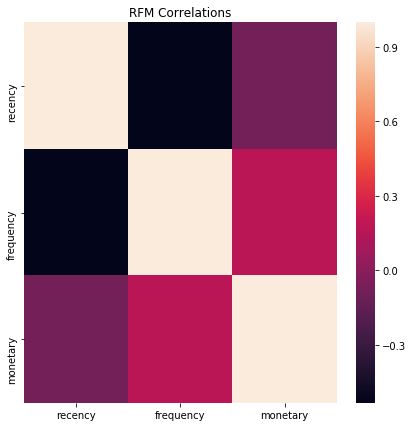

,recency,frequency,monetary
recency,1.000000,-0.534308,-0.079492
frequency,-0.534308,1.000000,0.172187
monetary,-0.079492,0.172187,1.000000


In [274]:

df_corr=rfm[['recency','frequency','monetary']]
plt4=plt.figure(figsize=(7,7))
sns.heatmap(df_corr.corr())
plt.title('RFM Correlations')
plt.show()
df_corr.corr()

>The above is a heatmap showing correlations between RFM metrics. We can see that recency and monetary have a slightly negative correlation, however not so strong.Recency and frequency have a good negative correlation of -0.5. Monetary and frequency have a correlation of 0.17 which is not very significant.
The most important correlation is that of recency and frequency.This might mean than people who have donated more recently may not have donated frequently or vice versa.

## Conclusion

>The main inferences derived from this analysis were:
<li> The population is right skewed with 80% people donating only 10% of the gifts.
<li> Almost half of the population are recent donors.
<li> Most donors only donate once or twice.

>Further scope for this project will be to model a K-means clustering based on 8 combinations of RFM so that people can be divided into clusters to better design targeted campaigns for each cluster of people.Please keep an eye out for this page, I will be updating it with the K-Means clustering model.

## Reference
> This Dataset was obtained from the book Data Science for Fundraising (https://www.amazon.com/Data-Science-Fundraising-Data-Driven-Solutions-ebook/dp/B07B7DJR6T).